# Markers in matplotlib

Matplotlib supports multiple categories of markers which are selected using the marker parameter of plot commands:

- Unfilled markers
- Filled markers
- Markers created from TeX symbols
- Markers created from Paths


In [1]:
import numpy as np
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
import matplotlib.path as mpath

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

## Unfilled markers

Unfilled markers are single-colored.

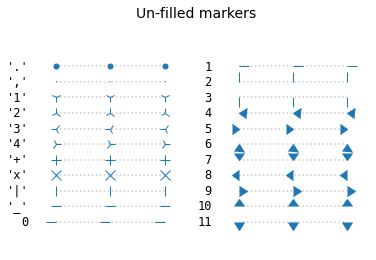

In [2]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

## Filled markers

They have separate `edge` and `face` colors.

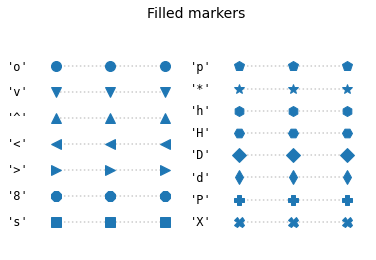

In [3]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

## Marker fill styles

The edge color and fill color of filled markers can be specified separately. Additionally, the `fillstyle` can be configured to be unfilled, fully filled, or half-filled in various directions. The half-filled styles use `markerfacecoloralt` as secondary fill color.

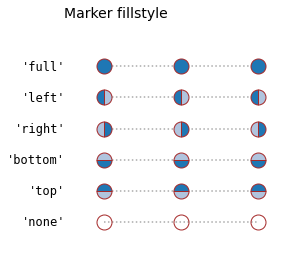

In [4]:
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)

## Markers created from TeX symbols

Use MathText, to use custom marker symbols, like e.g. `$\u266B$`.

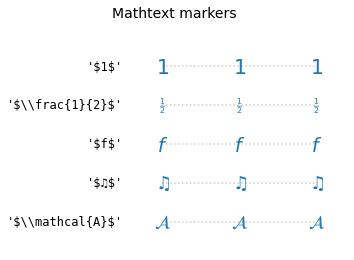

In [5]:
fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="none", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

## Markers created from Paths

Any `Path` can be used as a marker (`Path` objects in matplotlib are the objects responsible for shapes being drawn). The following example shows two simple paths *star* and *circle*, and a more elaborate path of a circle with a cut-out star.

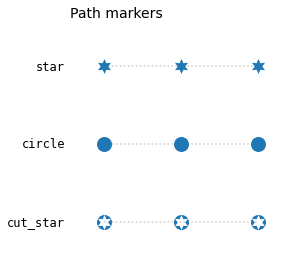

In [6]:
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes]))

fig, ax = plt.subplots()
fig.suptitle('Path markers', fontsize=14)
fig.subplots_adjust(left=0.4)

markers = {'star': star, 'circle': circle, 'cut_star': cut_star}

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

For a list of existing markers in matplotlib see [here](https://matplotlib.org/stable/api/markers_api.html).